In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
saureus = pd.read_csv('./saureus.csv')
df_s = saureus

In [2]:
def model_SAD(I,t,beta,k0,A,alpha):
    Na,Ns,Nd = I
    dNa = beta*Ns+k0*(1-Na/(A-Nd-Ns))*Na
    dNs = -alpha*Ns-beta*Ns
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD(t,beta,k0,A,alpha):
    return odeint(model_SAD,(Na0,Ns0,Nd0),t,args=(beta,k0,A,alpha))
def model_SAD2(I,t,beta,k0,A,alpha,gamma):
    Na,Ns,Nd = I
    dNa = beta*Ns+k0*(1-Na/(A-Nd-Ns))*Na-gamma*Na
    dNs = -alpha*Ns-beta*Ns+gamma*Na
    dNd = alpha*Ns
    return np.array([dNa,dNs,dNd])
def fit_model_SAD2(t,beta,k0,A,alpha,gamma):
    return odeint(model_SAD2,(Na0,Ns0,Nd0),t,args=(beta,k0,A,alpha,gamma))
def fit_od(t,beta,k0,A,alpha):
    return np.sum(fit_model_SAD(t,beta,k0,A,alpha),axis=1)
def fit_od2(t,beta,k0,A,alpha,gamma):
    return np.sum(fit_model_SAD2(t,beta,k0,A,alpha,gamma),axis=1)
def fit_CFU(t,beta,k0,A,alpha):
    return np.sum(fit_model_SAD(t,beta,k0,A,alpha)[:,0:2],axis=1)
def fit_CFU2(t,beta,k0,A,alpha,gamma):
    return np.sum(fit_model_SAD2(t,beta,k0,A,alpha,gamma)[:,0:2],axis=1)
def R_squared(Y,Y_fitted):
    mean = np.mean(Y)
    ss_tot = np.sum((Y - mean) ** 2)
    ss_res = np.sum((Y - Y_fitted) ** 2)
    r_squared = 1 - (ss_res / ss_tot) 
    return np.round(r_squared,3)

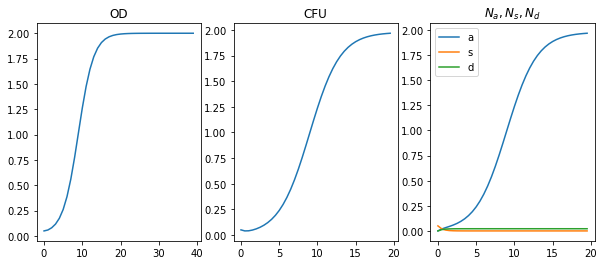

In [3]:
# 文献验证
Na0,Ns0,Nd0 = (0,0.05,0)
alpha = 0.77
beta = 1
A = 2.0
k0 = 0.5
t = np.arange(0,40,1)
t2 = np.arange(0,20,0.5)
fitted = fit_model_SAD(t,beta,k0,A,alpha)
od = np.sum(fitted,axis=1)
CFU = fit_CFU(t2,beta,k0,A,alpha)
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.title('OD')
plt.plot(t,od)
plt.subplot(132)
plt.title('CFU')
plt.plot(t2,CFU)
plt.subplot(133)
plt.title('$N_a,N_s,N_d$')
fitted = fit_model_SAD(t2,beta,k0,A,alpha)
plt.plot(t2,fitted[:,0],label = 'a')
plt.plot(t2,fitted[:,1],label = 's')
plt.plot(t2,fitted[:,2],label = 'd')
plt.legend()

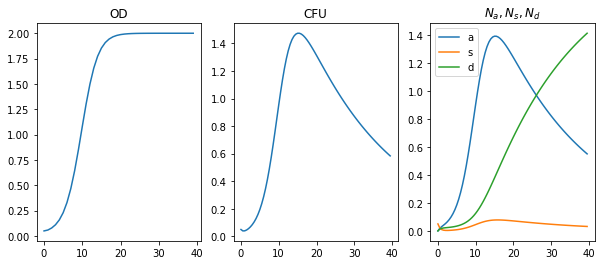

In [4]:
Na0,Ns0,Nd0 = (0,0.05,0)
alpha = 0.77
beta = 1
gamma = 0.1
A = 2.0
k0 = 0.5
t = np.arange(0,40,1)
t2 = np.arange(0,40,0.5)
fitted = fit_model_SAD2(t,beta,k0,A,alpha,gamma)
od = np.sum(fitted,axis=1)
CFU = fit_CFU2(t2,beta,k0,A,alpha,gamma)
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.title('OD')
plt.plot(t,od)
plt.subplot(132)
plt.title('CFU')
plt.plot(t2,CFU)
plt.subplot(133)
plt.title('$N_a,N_s,N_d$')
fitted = fit_model_SAD2(t2,beta,k0,A,alpha,gamma)
plt.plot(t2,fitted[:,0],label = 'a')
plt.plot(t2,fitted[:,1],label = 's')
plt.plot(t2,fitted[:,2],label = 'd')
plt.legend()

In [5]:
def equ(p):
    k,A,C = p
    e1 = 1.0 - A * np.e ** (k*24+C) / (1+np.e ** (k*24+C))
    e2 = 1.2 - A * np.e ** (k*48+C) / (1+np.e ** (k*48+C))
    e3 = A * np.e ** C /(1+np.e ** C) - 0.1
    return [e1,e2,e3]
res1 = optimize.fsolve(equ,(0.15,1,-2))
res1

array([ 0.16620767,  1.20454545, -2.40201899])

(0.7139764410953748, 0.560254183044661, 0.4182347447373627)

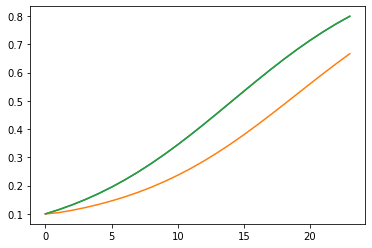

In [6]:
k0 = 0.1556
A = 1
alpha = 1
beta = 1
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
Na0,Ns0,Nd0 = (0,0.1,0)
fitted2 = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted)
plt.plot(t,fitted2)
plt.plot(t,A * np.e ** (k0 * t-2.197) / (1+ np.e ** (k0 * t-2.197)))
fitted[20],fitted2[20],fitted[12]

(0.9999998696895844, 0.616542762071018, 0.48122201352354105)

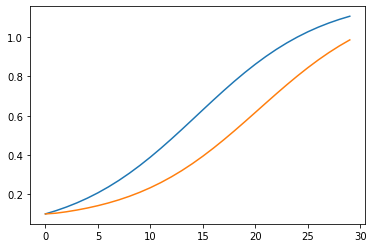

In [7]:
k0 = res1[0]
A = res1[1]
alpha = 1
ag = 10
beta = np.e ** (-0.376*ag + 3.41)
t = np.arange(0,30,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
Na0,Ns0,Nd0 = (0,0.1,0)
fitted2 = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted)
plt.plot(t,fitted2)
fitted[24],fitted2[20],fitted[12] 

array([-0.37593226,  3.40981756])

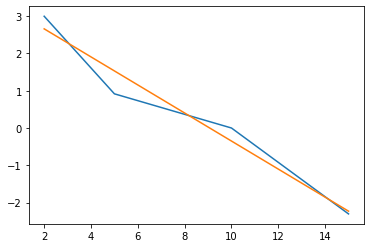

In [8]:
beta_set = np.array([20,2.5,1,0.1])
ag_set = np.array([2,5,10,15])
plt.plot(ag_set,np.log(beta_set))
def line(p):
    k,b = p
    return np.log(beta_set) - k*ag_set-b
fit_line = optimize.leastsq(line,[-1,1])
k,b = fit_line[0]
plt.plot(ag_set,k*ag_set+b)
fit_line[0]

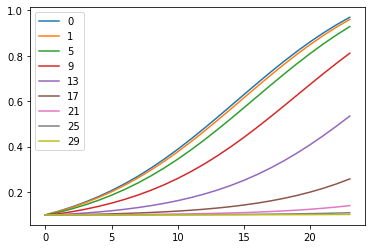

In [9]:
k0 = res1[0]
A = res1[1]
alpha = 1
beta = 0
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,30,4):
    beta = np.e ** (-0.376*ag + 3.41)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag))
plt.legend()

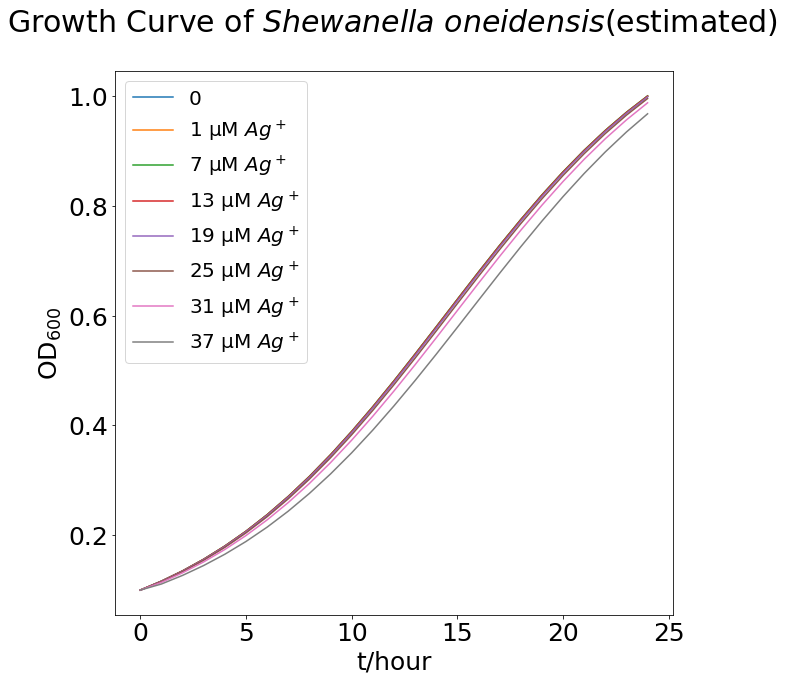

In [14]:
k0 = res1[0]
A = res1[1]
alpha = 0.7
beta = 0
plt.rcParams.update({'font.size': 25})
t = np.arange(0,25,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.figure(figsize=(10,10))
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,40,6):
    beta = np.e ** (-0.941*ag*0.173 + 7.4)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag) + ' $\mathrm{\mu M}$ $Ag^+$')
plt.xlabel('t/hour')
plt.ylabel('$\mathrm{OD}_{600}$')
plt.title('Growth Curve of $\it{Shewanella}$ $\it{oneidensis}$(estimated) \n')
plt.rcParams.update({'font.size': 20})
plt.legend()

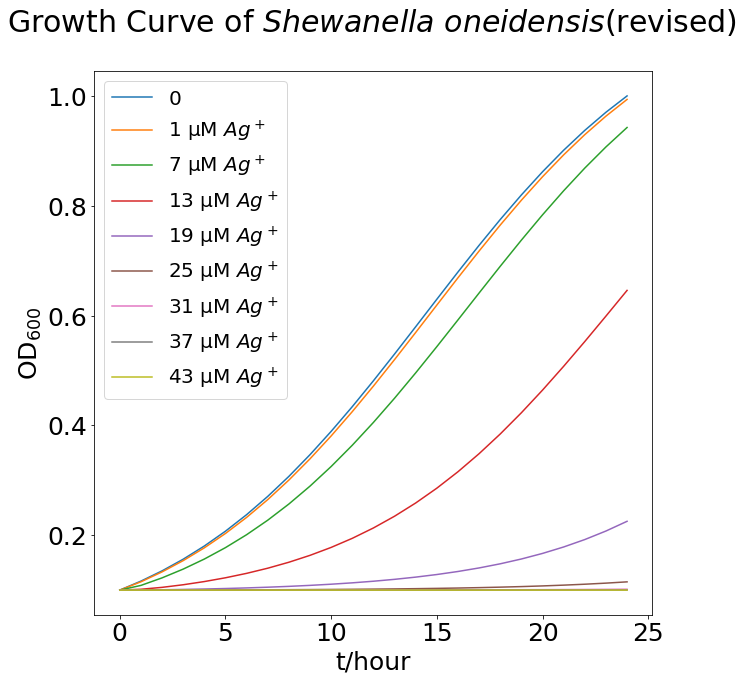

In [12]:
k0 = res1[0]
A = res1[1]
alpha = 0.7
beta = 0
t = np.arange(0,25,1)
plt.rcParams.update({'font.size': 25})
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.figure(figsize=(10,10))
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,46,6):
    beta = np.e ** (-0.376*ag + 3.41)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag) + ' $\mathrm{\mu M}$ $Ag^+$')
plt.xlabel('t/hour')
plt.ylabel('$\mathrm{OD}_{600}$')
plt.title('Growth Curve of $\it{Shewanella}$ $\it{oneidensis}$(revised) \n')
plt.rcParams.update({'font.size': 20})
plt.legend()

31.099974523351065
16.216593368084336
8.455887970851643
4.409190003883045
2.2991028922517938
1.1988311015187478
0.625111653250556
0.32595465577644805


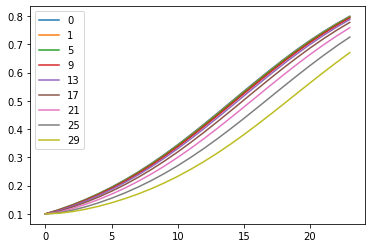

In [12]:
k0 = 0.1556
A = 1
alpha = 0.2
beta = 0
t = np.arange(0,24,1)
Na0,Ns0,Nd0 = (0.1,0,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted,label = '0')
Na0,Ns0,Nd0 = (0,0.1,0)
for ag in range(1,30,4):
    beta = np.e ** (-0.941*ag*0.173 + 3.6)
    print(beta)
    fitted2 = fit_od(t,beta,k0,A,alpha)
    plt.plot(t,fitted2,label = str(ag))
plt.legend()

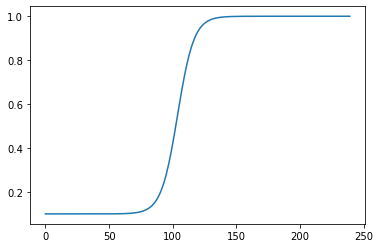

In [132]:
k0 = 0.1556
A = 1
alpha = 1
beta = 1e-6
t = np.arange(0,240,1)
Na0,Ns0,Nd0 = (0,0.1,0)
fitted = fit_od(t,beta,k0,A,alpha)
plt.plot(t,fitted,label = '0')